# Visual and Descriptive Primary Analysis (a.k.a. EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import plotly.graph_objects as go

In [2]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

#### i. Data Fetch

In [3]:
orders = pd.read_csv('datasets/cleaned datasets/data_orders.csv')
offers = pd.read_csv('datasets/cleaned datasets/data_offers.csv')


In [4]:
orders.head(5)

,Unnamed: 0,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,1,20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0
2,2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,4,21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0


In [5]:
offers.head(5)

,Unnamed: 0,order_gk,offer_id
0,0,3000579625629,300050936206
1,1,3000627306450,300052064651
2,2,3000632920686,300052408812
3,3,3000632771725,300052393030
4,4,3000583467642,300051001196


#### ii. Understanding Distributions From Dimensions

In [6]:
orders.drop(columns=['Unnamed: 0'],inplace=True)
offers.drop(columns=['Unnamed: 0'],inplace=True)

C:\Users\Fayaz Shaikh\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



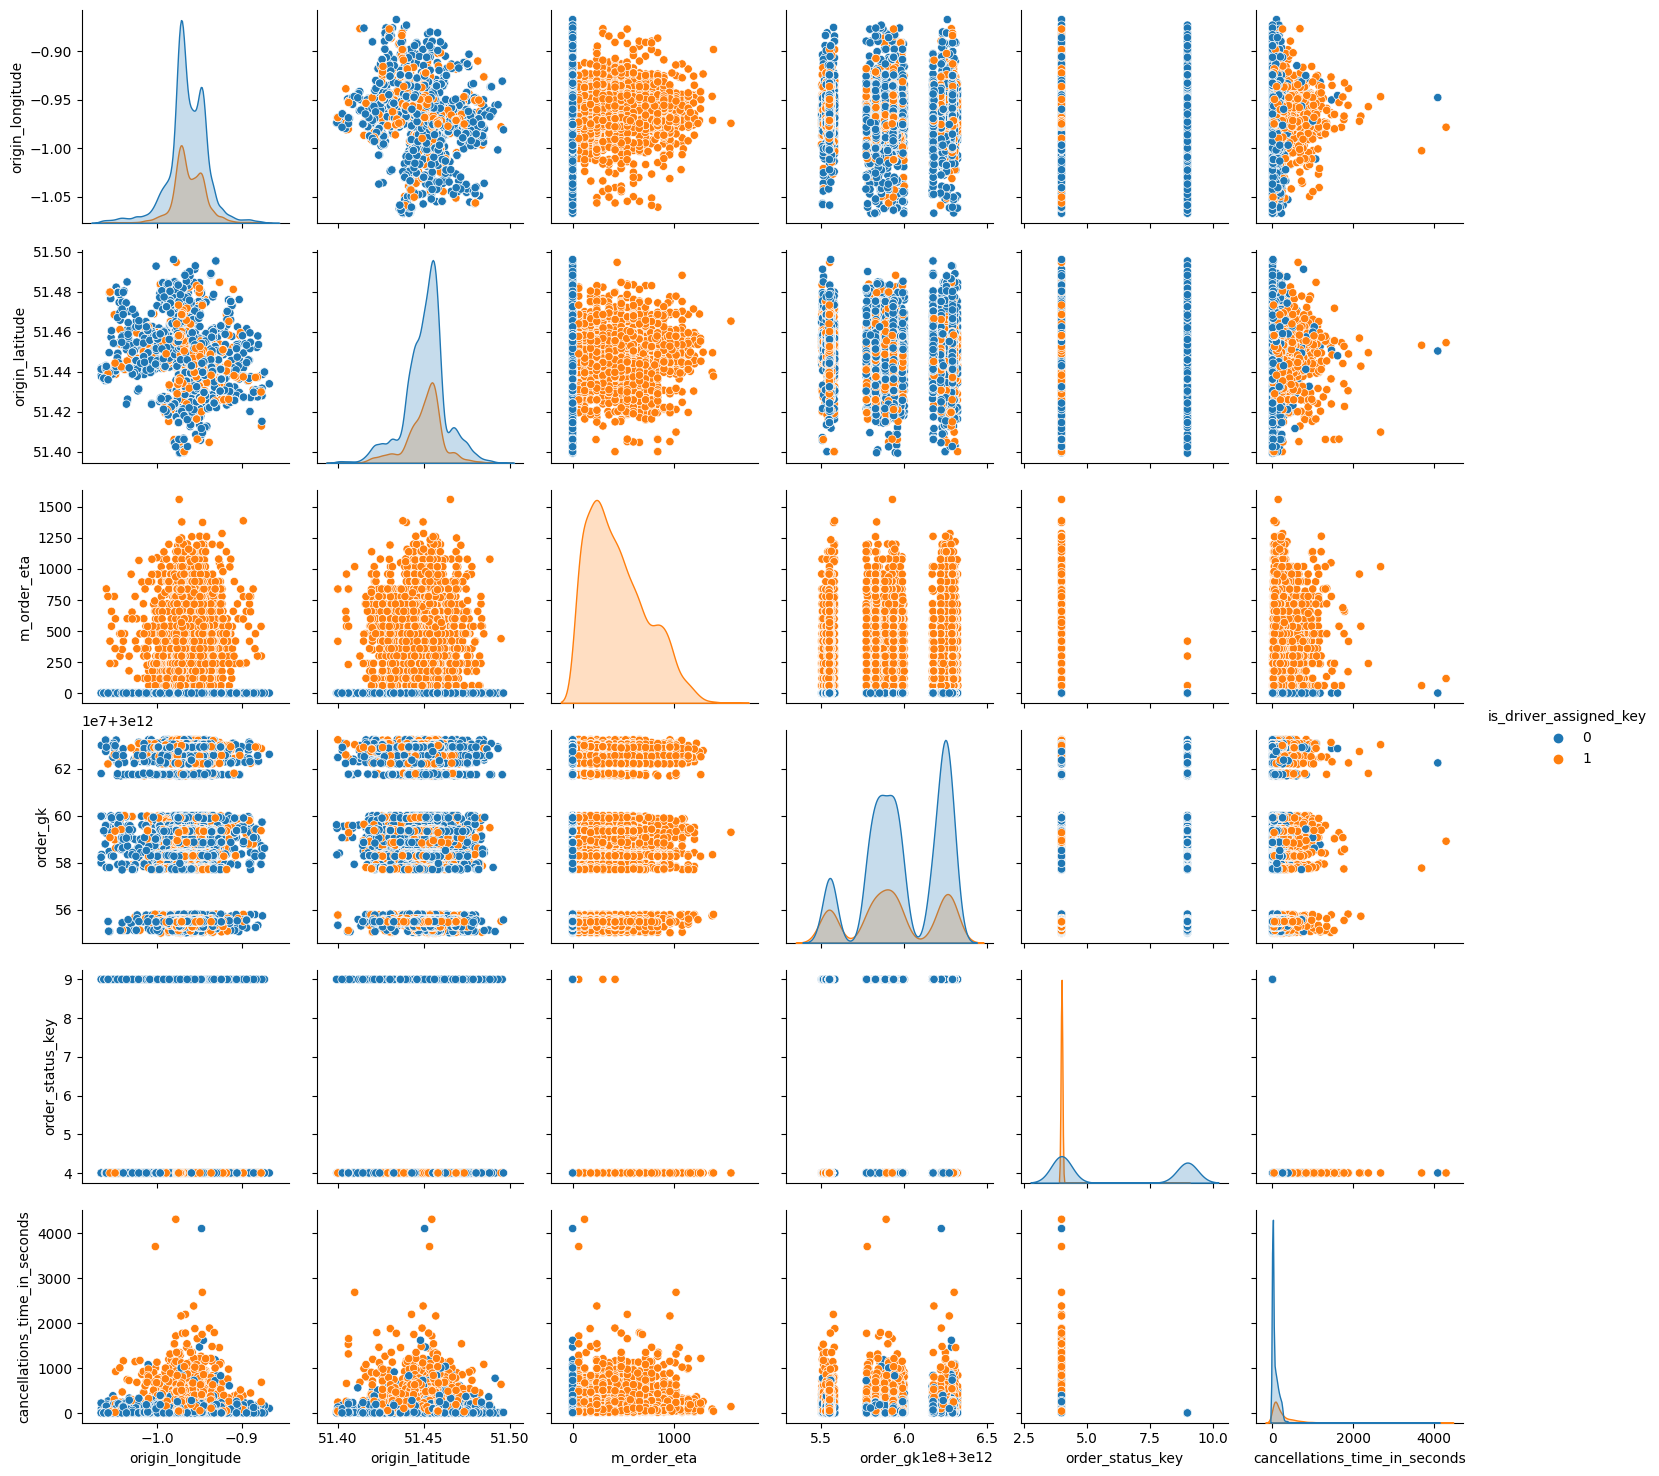

In [37]:
sns.pairplot(orders, hue='is_driver_assigned_key')
plt.show()

##### a. Understanding the proportions of cancellations

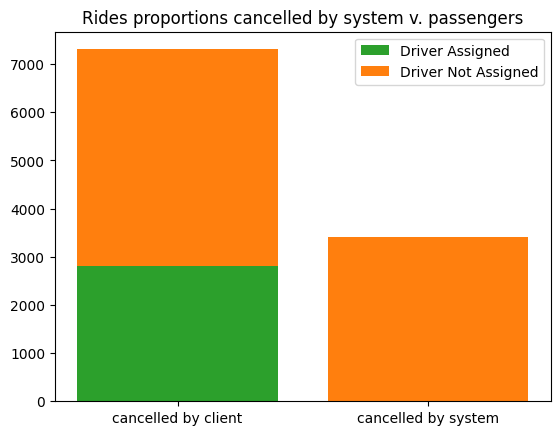

In [7]:
o4 = orders[orders['order_status_key'] == 4]
o9 = orders[orders['order_status_key'] == 9]

hist_key = ['cancelled by client', "cancelled by system"]
assigned_driver = [len(o4[o4['is_driver_assigned_key'] == 1]),len(o9[o9['is_driver_assigned_key'] == 1])]
unassigned_driver = [len(o4[o4['is_driver_assigned_key'] == 0]),len(o9[o9['is_driver_assigned_key'] == 0])]

plt.title('Rides proportions cancelled by system v. passengers')
plt.bar(hist_key, assigned_driver, color='tab:green')
plt.bar(hist_key, unassigned_driver, bottom=assigned_driver, color='tab:orange')
plt.legend(["Driver Assigned", "Driver Not Assigned"])
plt.show()

##### b. Understanding the distribution of Cancellation times based on who cancelled

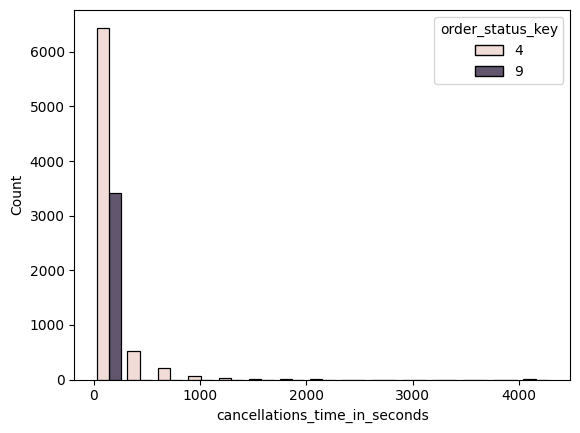

In [8]:
sns.histplot(data = orders ,x='cancellations_time_in_seconds', bins = 15, hue = 'order_status_key', shrink=0.8, multiple='dodge')
plt.show()

##### c. Understanding the distribution of Cancellation times based on driver assigned

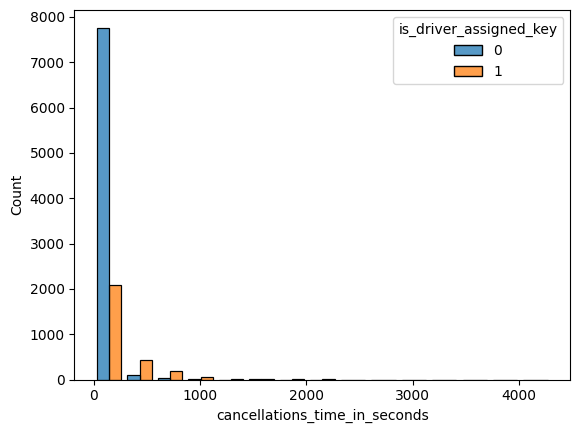

In [9]:
sns.histplot(data = orders, x='cancellations_time_in_seconds', bins = 15, hue = 'is_driver_assigned_key', shrink=0.8, multiple='dodge')
plt.show()

##### d. Closely inspecting the range with cancellation time less than 1000 seconds

In [10]:
ctl1000 = orders[orders['cancellations_time_in_seconds'] <= 1000]

In [11]:
ctl1000.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0


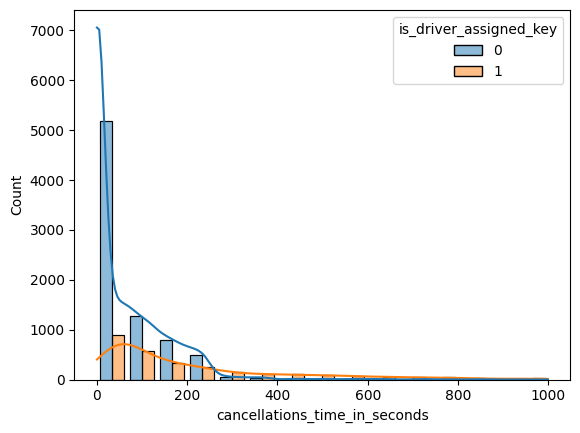

In [12]:
sns.histplot(data = ctl1000, x='cancellations_time_in_seconds', bins = 15, hue = 'is_driver_assigned_key', shrink=0.8, kde=True, multiple='dodge')
plt.show()

#### iii. Understanding Cancelation rates with time

In [13]:
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'], format='%H:%M:%S')

In [14]:
orders.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,1900-01-01 20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0
2,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,1900-01-01 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,1900-01-01 21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0


In [15]:
orders['hours'] = orders['order_datetime'].apply(lambda x: str(x)[11:13])

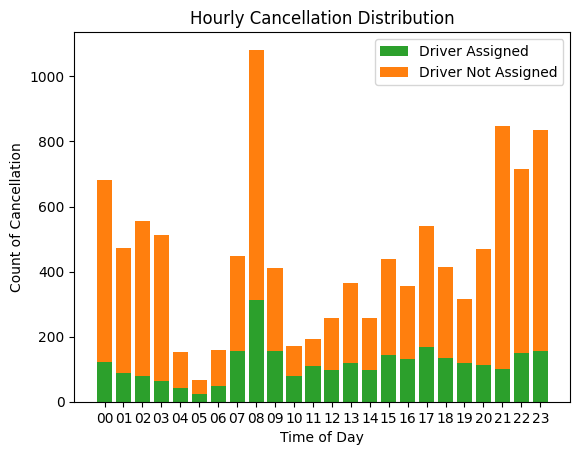

In [16]:
orders_gpb_hours_is_driver_assigned = orders.groupby(by=['hours', 'is_driver_assigned_key']).count()['order_gk']
orders_gpb_hours_is_driver_assigned = orders_gpb_hours_is_driver_assigned.unstack(level=1)

plt.title('Hourly Cancellation Distribution stacked by driver assignments')
plt.bar(orders_gpb_hours_is_driver_assigned.index, orders_gpb_hours_is_driver_assigned[1], color='tab:green')
plt.bar(orders_gpb_hours_is_driver_assigned.index, orders_gpb_hours_is_driver_assigned[0], bottom=orders_gpb_hours_is_driver_assigned[1], color='tab:orange')
plt.xlabel('Time of Day')
plt.ylabel('Count of Cancellation')
plt.legend(["Driver Assigned", "Driver Not Assigned"])
plt.show()

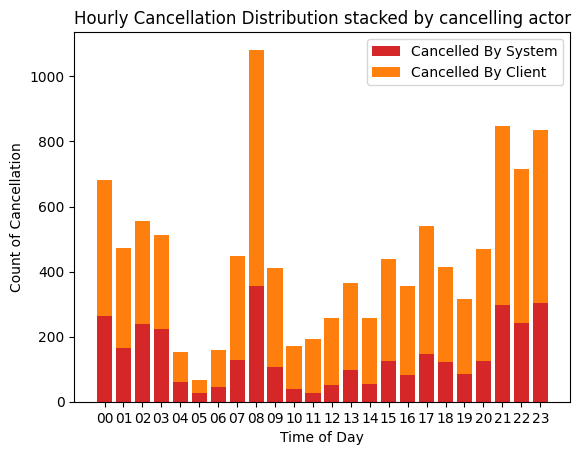

In [29]:
orders_gpb_hours_auto_can = orders.groupby(by=['hours', 'order_status_key']).count()['order_gk']
orders_gpb_hours_auto_can = orders_gpb_hours_auto_can.unstack(level=1)

plt.title('Hourly Cancellation Distribution stacked by cancelling actor')
plt.bar(orders_gpb_hours_auto_can.index, orders_gpb_hours_auto_can[9], color='tab:red')
plt.bar(orders_gpb_hours_auto_can.index, orders_gpb_hours_auto_can[4], bottom=orders_gpb_hours_auto_can[9], color='tab:orange')
plt.xlabel('Time of Day')
plt.ylabel('Count of Cancellation')
plt.legend(["Cancelled By System", "Cancelled By Client"])
plt.show()

#### iv. Understanding the progression of cancellation rates with time and location

In [31]:
fig = go.Figure(data=go.Scattergeo(lon = orders['origin_longitude'], lat = orders['origin_latitude'], mode = 'markers'))
fig.update_layout( title = 'Region Of Inspection', geo_scope='europe')
fig.show()

In [33]:
orders.to_csv('datasets/visualised datasets/data_orders.csv')
offers.to_csv('datasets/visualised datasets/data_offers.csv')

### Conclusion:
1. Highest Volume of Cancellation is observed within the first 15 minutes of ride booking.
2. Within the above mentioned cancellation the highest volume is driven by clients. 
3. Cancellation rates are highly correlated to ride assignment in the first 300 seconds.
4. The region of inspection is the UK. 
5. Highest cancellation by clients is during the time of [0800, 2100, 2200, 2300] hours.
6. Additional Visualisation done on Tableau (Accesible At: https://public.tableau.com/app/profile/sharvil.d/viz/Gett-Taxi-Cancellations/TimeV_LocationsofCancelations?publish=yes)